## Load the Data
Load the diabetes dataset from scikit-learn using the load_diabetes method.

In [1]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)

## Preprocess the Data
Scale the dataset using the StandardScaler method and fit the LassoLarsIC estimator with AIC criterion.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np

lasso_lars_ic = make_pipeline(StandardScaler(), LassoLarsIC(criterion="aic")).fit(X, y)
n_samples = 100

## Rescale AIC and BIC
Rescale the AIC and BIC to be in line with the definition in [ZHT2007]_.

In [8]:
def zou_et_al_criterion_rescaling(criterion, n_samples, noise_variance):
    """Rescale the information criterion to follow the definition of Zou et al."""
    return criterion - n_samples * np.log(2 * np.pi * noise_variance) - n_samples

aic_criterion = zou_et_al_criterion_rescaling(
    lasso_lars_ic[-1].criterion_,
    n_samples,
    lasso_lars_ic[-1].noise_variance_,
)

index_alpha_path_aic = np.flatnonzero(
    lasso_lars_ic[-1].alphas_ == lasso_lars_ic[-1].alpha_
)[0]

## Fit LassoLarsIC estimator with BIC criterion
Now fit the LassoLarsIC estimator with BIC criterio

In [9]:
lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(X, y)

bic_criterion = zou_et_al_criterion_rescaling(
    lasso_lars_ic[-1].criterion_,
    n_samples,
    lasso_lars_ic[-1].noise_variance_,
)

index_alpha_path_bic = np.flatnonzero(
    lasso_lars_ic[-1].alphas_ == lasso_lars_ic[-1].alpha_
)[0]

## Plot AIC and BIC Criterion
Plot the AIC and BIC criterion and the subsequent selected regularization parameter.

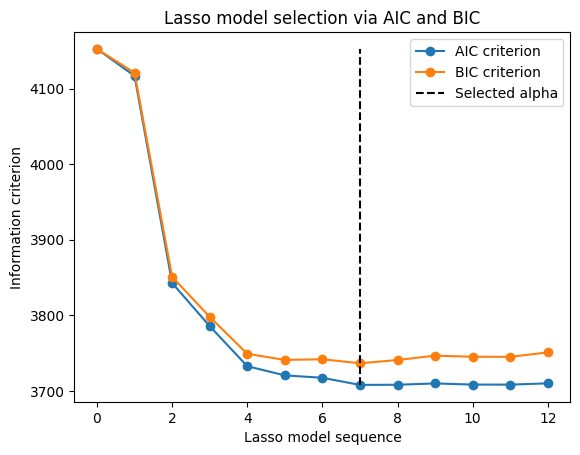

In [13]:
plt.plot(aic_criterion, color="tab:blue", marker="o", label="AIC criterion")
plt.plot(bic_criterion, color="tab:orange", marker="o", label="BIC criterion")
plt.vlines(
    index_alpha_path_bic,
    aic_criterion.min(),
    aic_criterion.max(),
    color="black",
    linestyle="--",
    label="Selected alpha",
)
plt.legend()
plt.ylabel("Information criterion")
plt.xlabel("Lasso model sequence")
_ = plt.title("Lasso model selection via AIC and BIC")

Summary
In this lab, we learned how to use LassoLarsIC estimator to select the best Lasso model using AIC and BIC criteria. We also learned how to rescale AIC and BIC to be in line with the definition in [ZHT2007]_.

https://arxiv.org/abs/0712.0881